# Preparation

In [1]:
# Import functions first
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-04-21 10:29:06.625737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 10:29:06.625847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 10:29:06.747358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import the competition data

In [2]:
# Import the competition data
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [3]:
# Display rows and columns
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Experimenting digits

In [4]:
# Drop labels
y = train_data['label']
train_data.drop("label", inplace=True, axis="columns")

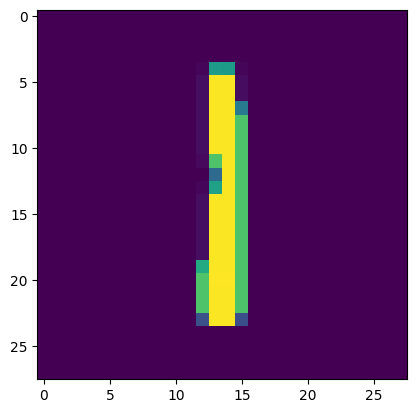

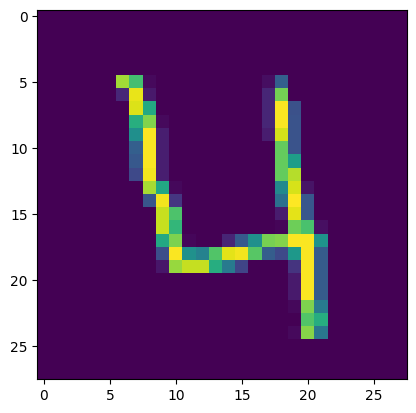

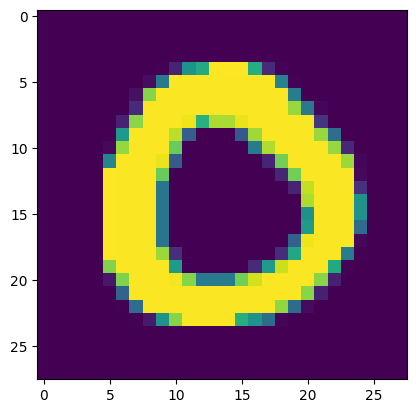

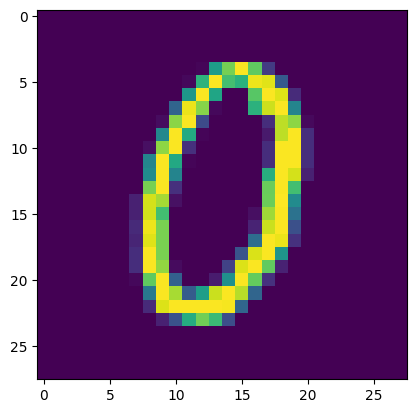

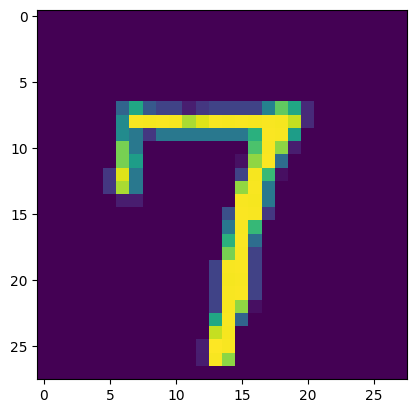

In [5]:
# Plot the first five digits along with the matrix conversion
sample1 = np.reshape(train_data.iloc[2, :].values, (28, 28))
plt.imshow(sample1)
plt.show()

sample2 = np.reshape(train_data.iloc[3, :].values, (28, 28))
plt.imshow(sample2)
plt.show()

sample3 = np.reshape(train_data.iloc[4, :].values, (28, 28))
plt.imshow(sample3)
plt.show()

sample4 = np.reshape(train_data.iloc[5, :].values, (28, 28))
plt.imshow(sample4)
plt.show()

sample5 = np.reshape(train_data.iloc[6, :].values, (28, 28))
plt.imshow(sample5)
plt.show()

# Preprocessing the data

In [6]:
X = train_data.values.reshape((len(train_data), 28, 28))
X_test = test_data.values.reshape((len(test_data), 28, 28))

X = X / 255.0
X_test = X_test / 255.0

X = np.expand_dims(X, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"No of data train: {X_train.shape[0]}")
print(f"No of data val: {X_val.shape[0]}")
print(f"No of data test: {X_test.shape[0]}")

No of data train: 33600
No of data val: 8400
No of data test: 28000


# Build and train the model

In [7]:
def build_model(input_shape=(28, 28, 1)):
    model = tf.keras.Sequential(
            layers=[tf.keras.layers.Input(shape=input_shape),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.MaxPooling2D(),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.MaxPooling2D(),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(10, activation='softmax'),
                   ]
            )
    
    model.build()
    model.summary()
    
    return model

In [8]:
model = build_model()

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

callbacks = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc",
                                                 factor=0.5,
                                                 patience=5,
                                                 min_lr=1e-3)

hist = model.fit(X_train, y_train, validation_data = (X_val, y_val),
                 epochs=20,
                 callbacks=[callbacks])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,202 (219.54 KB)

 Trainable params: 56,202 (219.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


2024-04-21 10:29:31.145540: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-04-21 10:29:31.145610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-04-21 10:29:31.145625: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-04-21 10:29:31.145637: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-04-21 10:29:31.145648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-04-21 10:29:31.145660: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-04-21 10:29:31.145671: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-04-21 10:29:31.145682: E external/local_xla/xla/se

  56/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.1579 - loss: 2.2359

I0000 00:00:1713695375.463993      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1035/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7331 - loss: 0.7713

2024-04-21 10:29:39.442023: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-04-21 10:29:39.442088: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-04-21 10:29:39.442097: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-04-21 10:29:39.442105: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-04-21 10:29:39.442112: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-04-21 10:29:39.442120: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-04-21 10:29:39.442128: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-04-21 10:29:39.442135: E external/local_xla/xla/ser

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - acc: 0.7353 - loss: 0.7652 - val_acc: 0.9730 - val_loss: 0.0912 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9626 - loss: 0.1230 - val_acc: 0.9811 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9749 - loss: 0.0869 - val_acc: 0.9843 - val_loss: 0.0540 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9799 - loss: 0.0669 - val_acc: 0.9860 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9826 - loss: 0.0568 - val_acc: 0.9887 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9842 - loss: 0.0526 - val_acc: 0.9882 - val_loss: 0.0581 - learning_rate: 0.0010
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9863 - loss: 0.0474 - val_acc: 0.9882 - val_loss: 0.0764 - learning_rate: 0.0010
Ep

# Predict the model

In [9]:
pred = model.predict(X_test)
res = np.argmax(pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


# Save as CSV submission file

In [10]:
results = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1, X_test.shape[0] + 1), name="ImageId"), results], axis=1)
submission.to_csv("submission.csv", index=False)
print("Successfully saved as CSV file")

Successfully saved as CSV file
